# Mathematical Underpinnings - Lab 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Task 1

### a)

$R(a,a^*) = \mathbb{E} \mathcal{L}(f(X), Y) = \mathbb{E}(aX - Y)^2 = \mathbb{E}(aX - (X+\epsilon))^2 = a^2 \mathbb{E} X^2 - 2a \mathbb{E}X(X+\epsilon)+\mathbb{E}(x+\epsilon)^2 = a^2\mathbb{E}X^2-2a \mathbb{E}X^2-2a\mathbb{E}X\mathbb{E}\epsilon+\mathbb{E}X^2+2\mathbb{E}X\mathbb{E}\epsilon+\mathbb{E}\epsilon^2 = a^2-2a+1+\sigma^2.$

In our task we know $a^* = 1$.

In [2]:
def population_risk(a, sigma_eps):
    return (a-1)**2+sigma_eps**2

### b)

In [11]:
# sampling
np.random.seed(123)
n=50
sigma_square=1
X = np.random.normal(0, 1, n)
epsilon = np.random.normal(0, sigma_square, n)
a0=1
Y= a0*X+epsilon
print(X, Y)

[ 0.55840768  0.74786237 -0.30399216  1.22270026  1.18942377  1.50184078
  1.31144415  0.19287411 -0.22655724 -0.89209756  0.16106588 -0.32710561
 -0.2004147   0.14400099  0.01394046  1.41389881 -1.42380379 -0.03141187
 -0.03856452  1.40281958 -0.0205271   1.90102917 -0.34931589 -0.35254939
 -0.6977066   0.55137093  0.16926855  0.14447745 -0.83377098  0.84235182
  1.07215005 -1.00115495 -0.23915482  0.13927952 -0.23151214 -0.54860659
 -1.31139564  0.31472611 -1.70918521 -0.7249702   1.01781952 -1.02133182
 -0.34704115 -0.12845925  0.36423377  0.42367862 -0.76782256  0.28399178
 -0.69225133  0.9447015 ] [ 0.22502326 -0.45056744 -1.1045735  -0.04243027 -1.18572415  2.08111819
  1.77461404  1.39884532  0.33024466 -0.70204601  0.33895963  1.24350765
 -0.22341297  0.87907001 -0.34910153  2.43413261 -1.59554087  2.24530533
  1.66042166  0.40952854 -0.50611448  1.70650536 -1.04018739 -0.44738287
  0.52304053 -1.92745681  1.2006864  -0.59408224  0.11544615  1.14187861
 -0.57101512 -1.08841532 

Empirical risk: $\frac{1}{n} \sum_{i=1}^n (ax_i - y_i)^2$

In [4]:
def empirical_risk(a, x, y):
    return np.sum((a*x-y)**2)/y.shape[0]

### c)

In [20]:
from scipy.optimize import minimize

N = 200
a_seq = np.linspace(0,2,N)
empirical_risk_list = np.zeros(N)
population_risk_list = np.zeros(N)

for i in range(N):
    empirical_risk_list[i]=empirical_risk(a_seq[i], X, Y)
    population_risk_list[i]= population_risk(a_seq[i], sigma_square)

print(f'Argmin of population risk: {a0}, min: {population_risk(a0, sigma_square)}.')

Argmin of population risk: 1, min: 1.


In [21]:
def empirical_risk_x_y(a):
    return empirical_risk(a, X, Y)

result_minimization = minimize(empirical_risk_x_y, x0=0)

print(f'Argmin of empirical risk: {result_minimization.x[0]}, min: {result_minimization.fun}.')
print(f'Population risk for: {result_minimization.x[0]} is {population_risk(result_minimization.x[0], sigma_square)}.')

Argmin of empirical risk: 0.8512078176431362, min: 1.1059458998471712.
Population risk for: 0.8512078176431362 is 1.0221391135305182.


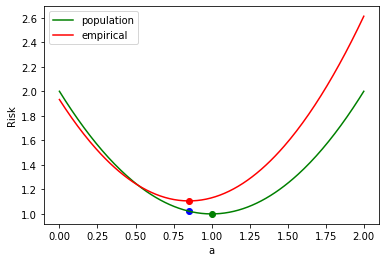

In [22]:
#plot
plt.plot(a_seq, population_risk_list, c="green", label="population")
plt.plot(a_seq, empirical_risk_list, c="red", label="empirical")
plt.scatter(a0, population_risk(a0, sigma_square), c="green")
plt.scatter(result_minimization.x[0], empirical_risk(result_minimization.x[0], X, Y), c="red")
plt.scatter(result_minimization.x[0], population_risk(result_minimization.x[0], sigma_square), c="blue")

plt.ylabel("Risk")
plt.xlabel("a")
plt.legend()
plt.show()

Value of population risk at the point minimising the empirical risk is ERM estimator.

### d)

Excess risk: $$E(\hat a, a^*) =R(\hat a, a^*) - \textrm{inf}_{a \in A_0} R(a, a^*)$$

In [23]:
# excess risk
population_risk(result_minimization.x[0], sigma_square) - population_risk(a0, sigma_square)

0.02213911353051823

In [24]:
# simulations with fixed sample size
L=200
excess_risk_list = np.zeros(L)

for i in range(L):
    a0=1
    X = np.random.normal(0, 1, n)
    epsilon = np.random.normal(0, sigma_square, n)
    Y= a0*X+epsilon

    result_minimization = minimize(empirical_risk_x_y, x0=0)
    a_hat = result_minimization.x[0]

    excess_risk_list[i]=population_risk(a_hat, sigma_square) - population_risk(a0, sigma_square)

np.mean(excess_risk_list)

0.018645010303586812

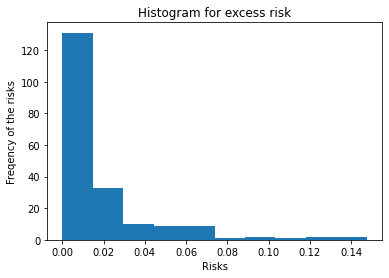

In [27]:
plt.hist(excess_risk_list)
plt.xlabel('Risks')
plt.ylabel('Freqency of the risks')
plt.title('Histogram for excess risk')
plt.show()

In [28]:
# simulations for various sample sizes
n_list=[25, 50, 75, 100, 200, 300, 400, 500, 1000]
mean_list=np.zeros(len(n_list))

for j in range(len(n_list)):
    n=n_list[j]
    excess_risk_list = np.zeros(L)

    for i in range(L):
        a0=1
        X = np.random.normal(0, 1, n)
        epsilon = np.random.normal(0, sigma_square, n)
        Y= a0*X+epsilon

        result_minimization = minimize(empirical_risk_x_y, x0=0)
        a_hat = result_minimization.x[0]

        excess_risk_list[i]=population_risk(a_hat, sigma_square) - population_risk(a0, sigma_square)

    mean_list[j] = np.mean(excess_risk_list)

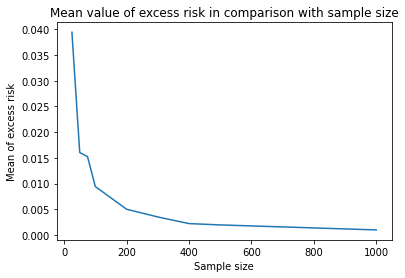

In [30]:
# a nice plot visualising the results (how the unconditional excess risk changes with a sample size)
plt.plot(n_list, mean_list)
plt.ylabel('Mean of excess risk')
plt.xlabel('Sample size')
plt.title('Mean value of excess risk in comparison with sample size')
plt.show()